## Feature Detection and Matching using ORB, SIFT, and Hough Transform

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(image, title=None, size=5):
    imgType = image.shape
    plt.figure(figsize=(size,size))
    if len(imgType)>2:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'gray')
    else:
        plt.imshow(image, 'gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

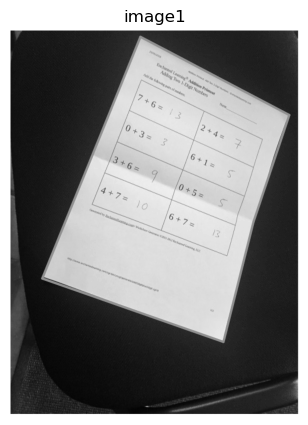

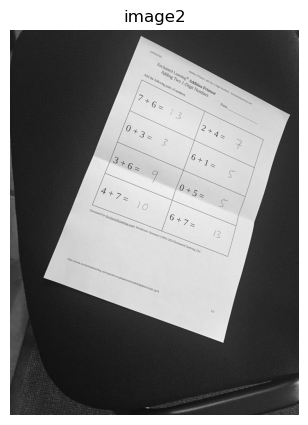

In [3]:
image = cv2.imread('contours.jpg', 0)
image2 = cv2.imread('scan.jpg',0)
imshow(image, 'image1')
imshow(image2, 'image2')

### ORB Feature Descriptor

In [4]:
orb = cv2.ORB_create()
kl1,des1 = orb.detectAndCompute(image, None)
kl2, des2 = orb.detectAndCompute(image2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x : x.distance)
matchingResult = cv2.drawMatches(image, kl1,image2,kl2, matches[:50], None, flags=2)

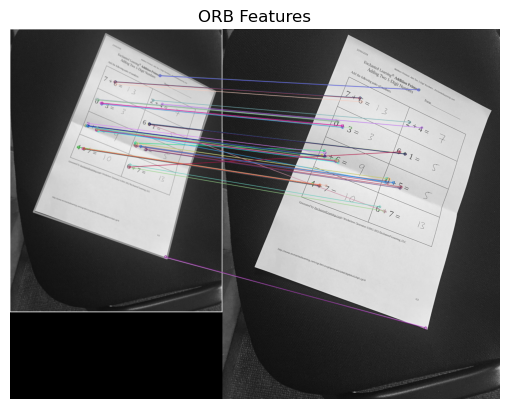

In [5]:
plt.imshow(matchingResult, cmap='gray')
plt.title('ORB Features')
plt.axis("off")  # Hide axes
plt.show()

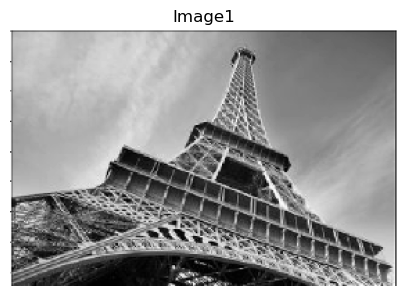

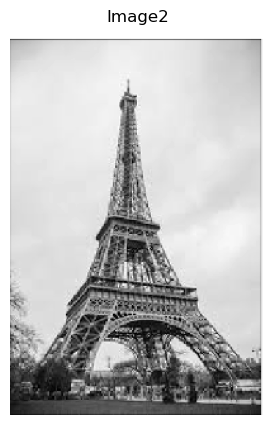

In [6]:
image1 = cv2.imread('./Effiel1.png', 0)
image2 = cv2.imread('./Effiel2.png', 0)
imshow(image1, 'Image1')
imshow(image2, 'Image2')

In [7]:
orb = cv2.ORB_create()
kl1,des1 = orb.detectAndCompute(image1, None)
kl2, des2 = orb.detectAndCompute(image2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x : x.distance)
matchingResult = cv2.drawMatches(image1, kl1,image2,kl2, matches[:50], None, flags=2)

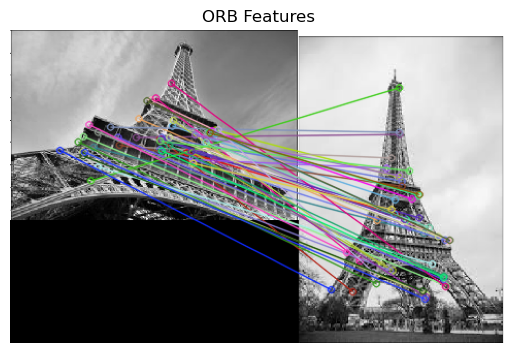

In [8]:
plt.imshow(matchingResult, cmap='gray')
plt.title('ORB Features')
plt.axis("off")  # Hide axes
plt.show()

### Scale Invariant Feature Transform (SIFT)


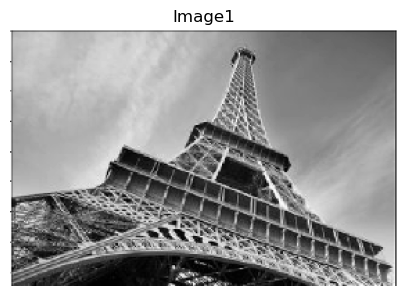

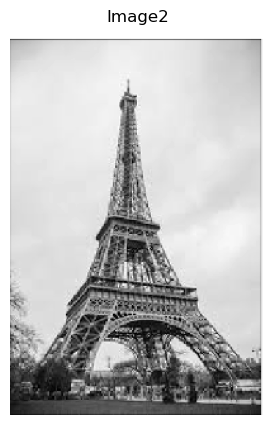

In [9]:
image1 = cv2.imread('./Effiel1.png', 0)
image2 = cv2.imread('./Effiel2.png', 0)
imshow(image1, 'Image1')
imshow(image2, 'Image2')

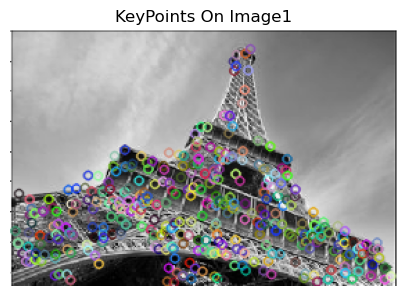

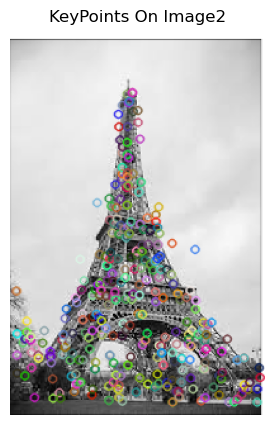

In [10]:
sift = cv2.SIFT_create() # OpenCV 4.x, the xfeatures2d module has been deprecated, and you need to use the cv2.SIFT_create() and cv2.SURF_create() functions directly.
keyPoints1, descriptor1 = sift.detectAndCompute(image1, None)
resultImage1 = cv2.drawKeypoints(image1, keyPoints1, None)
keyPoints2, descriptor2 = sift.detectAndCompute(image2, None)
resultImage2 = cv2.drawKeypoints(image2, keyPoints2, None)
imshow(resultImage1, 'KeyPoints On Image1')
imshow(resultImage2, 'KeyPoints On Image2')

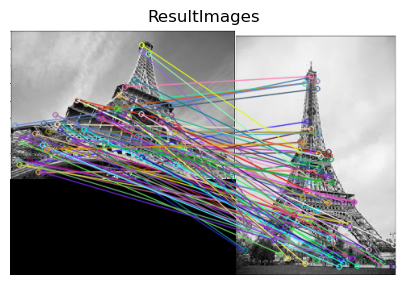

In [11]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptor1, descriptor2)
matches = sorted(matches, key=lambda x: x.distance)
result = cv2.drawMatches(image1, keyPoints1, image2, keyPoints2, matches, None, flags=2)
imshow(result, 'ResultImages')

---

## Hough Transform
* The Hough Transform is an algorithm for detecting shapes like lines and circles.  
* It is a feature extraction technique used in image processing and computer vision to detect geometric shapes such as lines and circles.  
* It was first patented in 1962 and later improved in 1972.


Hough Transform can detect different shapes, including:
- Lines → `cv2.HoughLines()` and `cv2.HoughLinesP()`  
- Circles → `cv2.HoughCircles()`  

It can also be extended to detect other geometric shapes, but lines and circles are the most common.

Every line can be written as: $\rho = x\cos(\theta) + y\sin(\theta)$

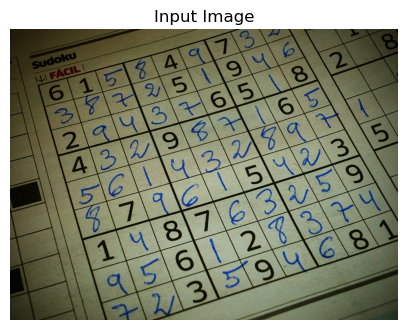

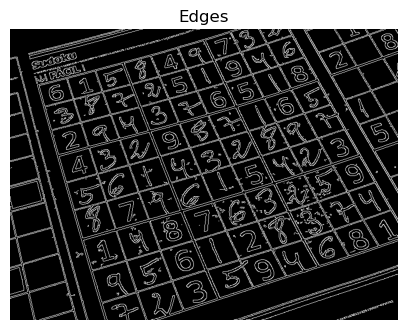

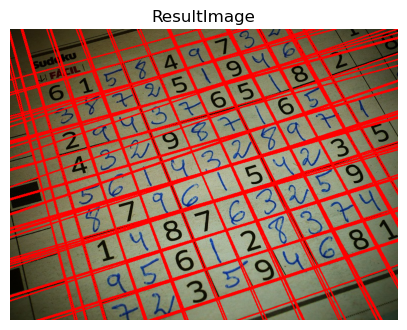

In [13]:
img = cv2.imread('soduku.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

imshow(img, 'Input Image')
imshow(edges, 'Edges')

lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

for line in lines:
    rho, theta = line[0]
    a, b = np.cos(theta), np.sin(theta)
    x0, y0 = a * rho, b * rho
    x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
    x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


imshow(img, 'ResultImage')

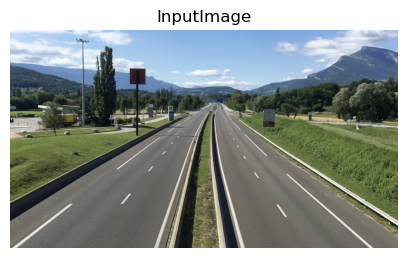

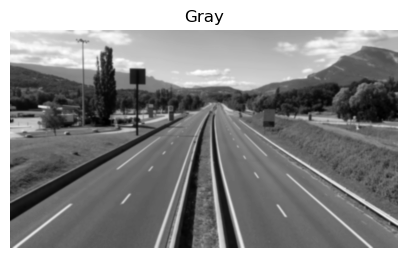

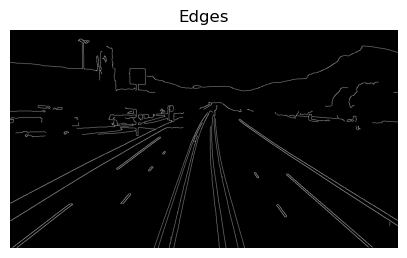

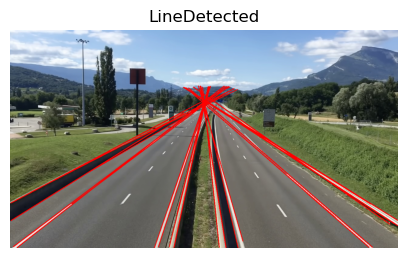

In [14]:
image = cv2.imread('./filtered_road.jpg')
imshow(image, 'InputImage')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (11,11), 0)
imshow(gray, 'Gray')
edges = cv2.Canny(gray, 50, 200)
imshow(edges, 'Edges')

lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold = 100, minLineLength=5, maxLineGap=250)
for line in lines:
    x1, y1, x2, y2 = line[0]
    if (y1 > 400 or y2 > 400): #Filter out the lines in the top of the image
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        
imshow(image, 'LineDetected')

---